<a href="https://colab.research.google.com/github/coderzaman/Data-Analysis-Notebooks/blob/main/HIV_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# Installing packages
!pip install watermark
!pip install pydotplus

In [29]:
# Import of libraries

# System libraries
import re
import string
import unicodedata
import itertools
from collections import Counter

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib.dates as mdates
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Colab Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

Python version in this Colab Notebook: 3.12.11
Author: Library versions

watermark : 2.5.0
google    : 2.0.3
re        : 2.2.1
platform  : 1.0.8
seaborn   : 0.13.2
plotly    : 5.24.1
matplotlib: 3.10.0
pandas    : 2.2.2
numpy     : 2.0.2



In [30]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Dataset/HIV_dataset.csv")
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Marital Staus,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking,Result
0,22,UNMARRIED,NO,College Degree,YES,NO,Bar,Heterosexual,YES,POSITIVE
1,20,UNMARRIED,NO,College Degree,NO,YES,NaN,Heterosexual,NO,NEGATIVE
2,23,Married,YES,College Degree,NO,YES,NaN,Bisexual,NO,NEGATIVE
3,24,Married,NO,College Degree,YES,YES,Park,Heterosexual,YES,POSITIVE
4,18,UNMARRIED,YES,Senior High School,YES,NO,Internet,Heterosexual,YES,POSITIVE
...,...,...,...,...,...,...,...,...,...,...
693,19,UNMARRIED,YES,Illiteracy,NO,NO,Internet,Heterosexual,NO,POSITIVE
694,47,MARRIED,NO,College Degree,NO,YES,Bar,Bisexual,NO,NEGATIVE
695,34,UNMARRIED,YES,Senior High School,YES,YES,Park,Homosexual,YES,NEGATIVE
696,25,MARRIED,NO,Junior High School,NO,NO,Public Bath,Heterosexual,YES,POSITIVE


In [31]:
df.head()

,Age,Marital Staus,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking,Result
0,22,UNMARRIED,NO,College Degree,YES,NO,Bar,Heterosexual,YES,POSITIVE
1,20,UNMARRIED,NO,College Degree,NO,YES,NaN,Heterosexual,NO,NEGATIVE
2,23,Married,YES,College Degree,NO,YES,NaN,Bisexual,NO,NEGATIVE
3,24,Married,NO,College Degree,YES,YES,Park,Heterosexual,YES,POSITIVE
4,18,UNMARRIED,YES,Senior High School,YES,NO,Internet,Heterosexual,YES,POSITIVE


In [32]:
df.tail()

,Age,Marital Staus,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking,Result
693,19,UNMARRIED,YES,Illiteracy,NO,NO,Internet,Heterosexual,NO,POSITIVE
694,47,MARRIED,NO,College Degree,NO,YES,Bar,Bisexual,NO,NEGATIVE
695,34,UNMARRIED,YES,Senior High School,YES,YES,Park,Homosexual,YES,NEGATIVE
696,25,MARRIED,NO,Junior High School,NO,NO,Public Bath,Heterosexual,YES,POSITIVE
697,46,Cohabiting,YES,Senior High School,YES,NO,Internet,Homosexual,NO,POSITIVE


In [33]:
df.shape

(698, 10)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             698 non-null    int64 
 1   Marital Staus                   698 non-null    object
 2   STD                             698 non-null    object
 3   Educational Background          698 non-null    object
 4   HIV TEST IN PAST YEAR           698 non-null    object
 5   AIDS education                  698 non-null    object
 6   Places of seeking sex partners  676 non-null    object
 7   SEXUAL ORIENTATION              698 non-null    object
 8   Drug- taking                    698 non-null    object
 9   Result                          698 non-null    object
dtypes: int64(1), object(9)
memory usage: 54.7+ KB


In [35]:
df.dtypes

,0
Age,int64
Marital Staus,object
STD,object
Educational Background,object
HIV TEST IN PAST YEAR,object
AIDS education,object
Places of seeking sex partners,object
SEXUAL ORIENTATION,object
Drug- taking,object
Result,object


In [36]:
df.Result.value_counts()

,count
Result,
NEGATIVE,349
POSITIVE,343
Positive,3
Negative,3


In [37]:
data = df

In [38]:
# Convert all columns to lowercase except 'Age'
for col in data.columns:
    if data[col].dtype == 'object':  # Check if column is of string type
        data[col] = data[col].str.lower()

In [39]:
data.Result.value_counts()

,count
Result,
negative,352
positive,346


In [40]:
data.columns = data.columns.str.replace(r'[^\w]', '', regex=True).str.strip()

In [41]:
# Check for any missing values
data.isnull().sum()

,0
Age,0
MaritalStaus,0
STD,0
EducationalBackground,0
HIVTESTINPASTYEAR,0
AIDSeducation,0
Placesofseekingsexpartners,22
SEXUALORIENTATION,0
Drugtaking,0
Result,0


In [42]:
data = data.fillna('None')

In [43]:
# Check for any missing values
data.isnull().sum()

,0
Age,0
MaritalStaus,0
STD,0
EducationalBackground,0
HIVTESTINPASTYEAR,0
AIDSeducation,0
Placesofseekingsexpartners,0
SEXUALORIENTATION,0
Drugtaking,0
Result,0


In [44]:
missing_data = data.isnull()

print("Missing data by column:")
missing_data


Missing data by column:


,Age,MaritalStaus,STD,EducationalBackground,HIVTESTINPASTYEAR,AIDSeducation,Placesofseekingsexpartners,SEXUALORIENTATION,Drugtaking,Result
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
693,False,False,False,False,False,False,False,False,False,False
694,False,False,False,False,False,False,False,False,False,False
695,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False


In [45]:
total_missing = data.isnull().sum().sum()
print("Total data missing in DataFrame:", total_missing)

Total data missing in DataFrame: 0


# **Exploratory Data Analysis and Data Visualization**

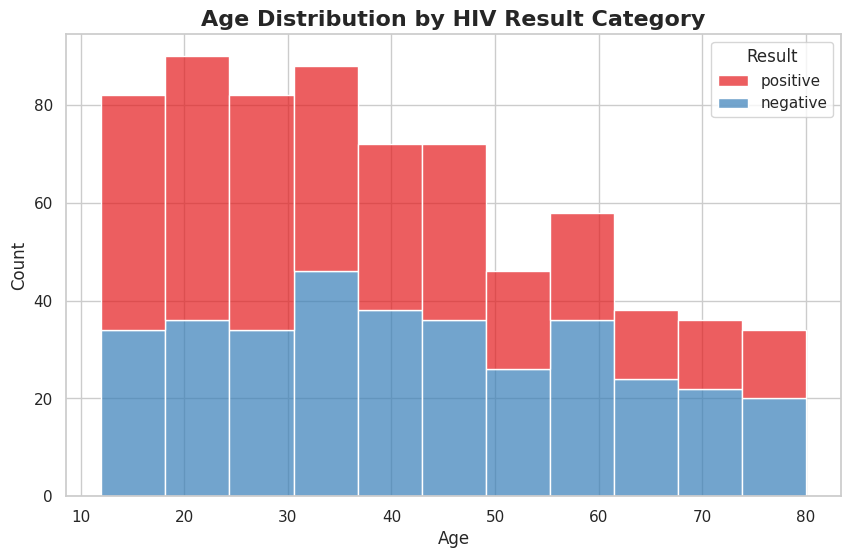

In [46]:
# Age Distribution by Patient Category
plt.figure(figsize=(10, 6))

# Create the histogram
bars = sns.histplot(data=df, x='Age', hue='Result', multiple='stack', palette='Set1', alpha=0.7)

# Add a title
plt.title('Age Distribution by HIV Result Category', fontsize=16, fontweight='bold')  # Customize the title
plt.show()

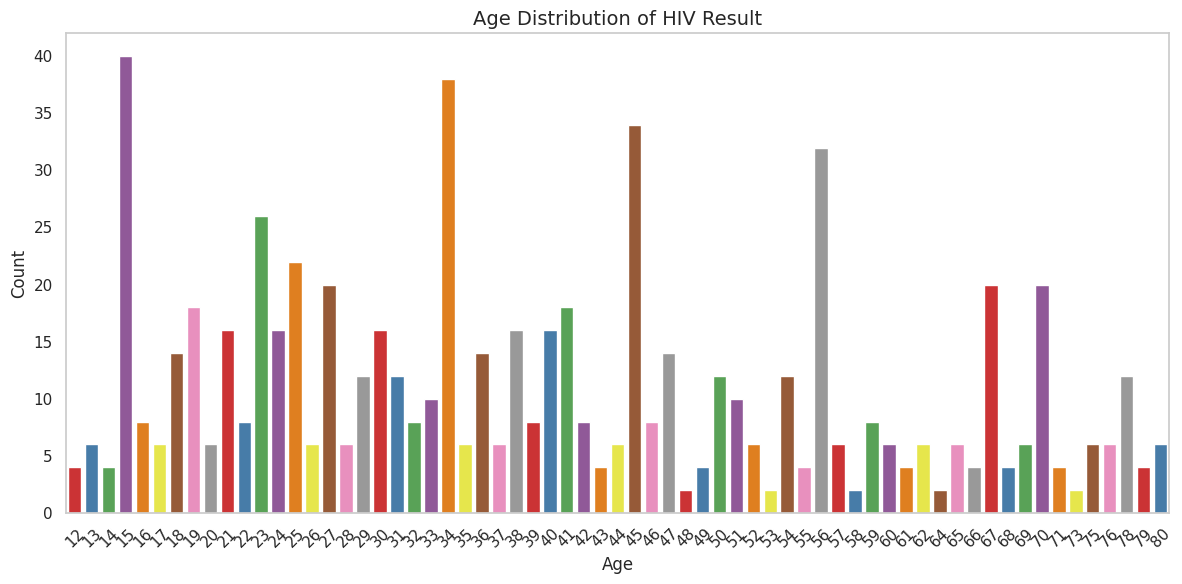

In [47]:
plt.figure(figsize=(12, 6))  # Set the figure size

# Create a count plot for the 'Age' column
sns.countplot(x="Age", data=df, palette="Set1")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and axis labels
plt.title('Age Distribution of HIV Result', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()  # Ensure all elements fit within the figure bounds
plt.grid(False)  # Disable grid lines for a cleaner look

plt.show()  # Display the plot


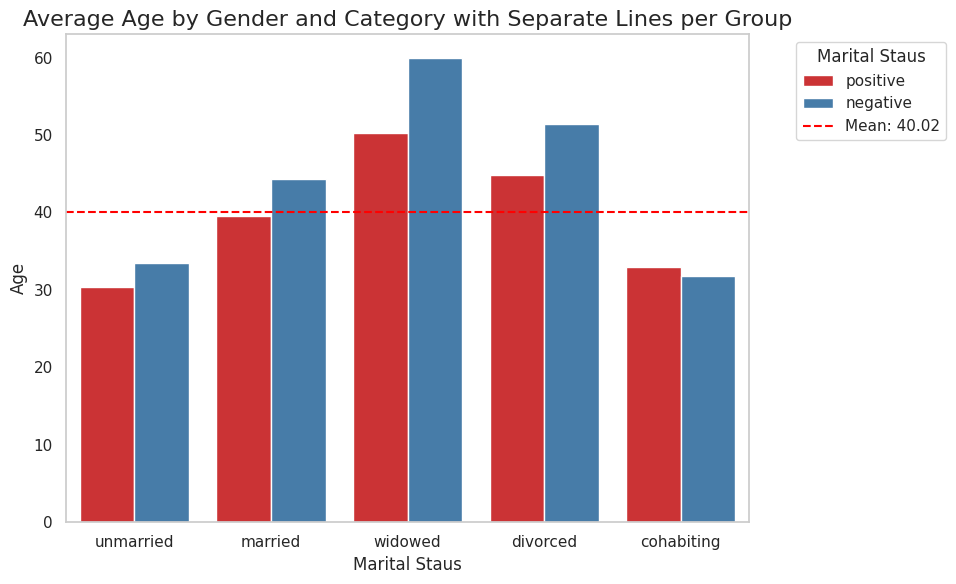

In [48]:
# Set up the figure

plt.figure(figsize=(10, 6))
# Create the barplot
bars = sns.barplot(x="MaritalStaus", y="Age", data=data, hue="Result", ci=None, palette="Set1")

mean_height = data['Age'].mean()
plt.axhline(mean_height, color='red', linestyle='--', label=f'Mean: {mean_height:.2f}')

# Add title and labels
plt.title('Average Age by Gender and Category with Separate Lines per Group', fontsize=16)
plt.xlabel('Marital Staus', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Adjust the legend position
plt.legend(title='Marital Staus', loc='upper right', bbox_to_anchor=(1.3, 1))

# Display the plot
plt.tight_layout()
plt.grid(False)
plt.show()


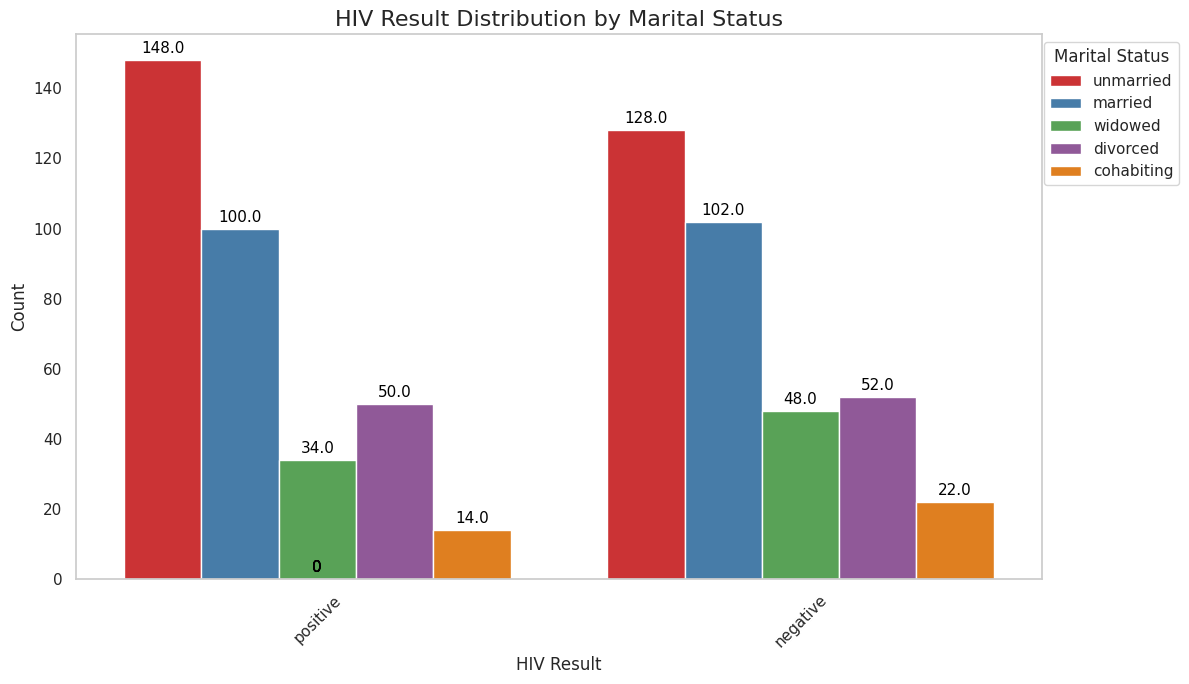

In [49]:
plt.figure(figsize=(12, 7))  # Adjusted figure size
sns.countplot(data=data, x='Result', hue='MaritalStaus', palette='Set1')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and axis labels
plt.title('HIV Result Distribution by Marital Status', fontsize=16)
plt.xlabel('HIV Result', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add annotations to each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                       textcoords='offset points')

# Move the legend
plt.legend(title='Marital Status', loc='upper right', bbox_to_anchor=(1.15, 1))

# Display the plot
plt.tight_layout()  # Ensure everything fits
plt.grid(False)
plt.show()

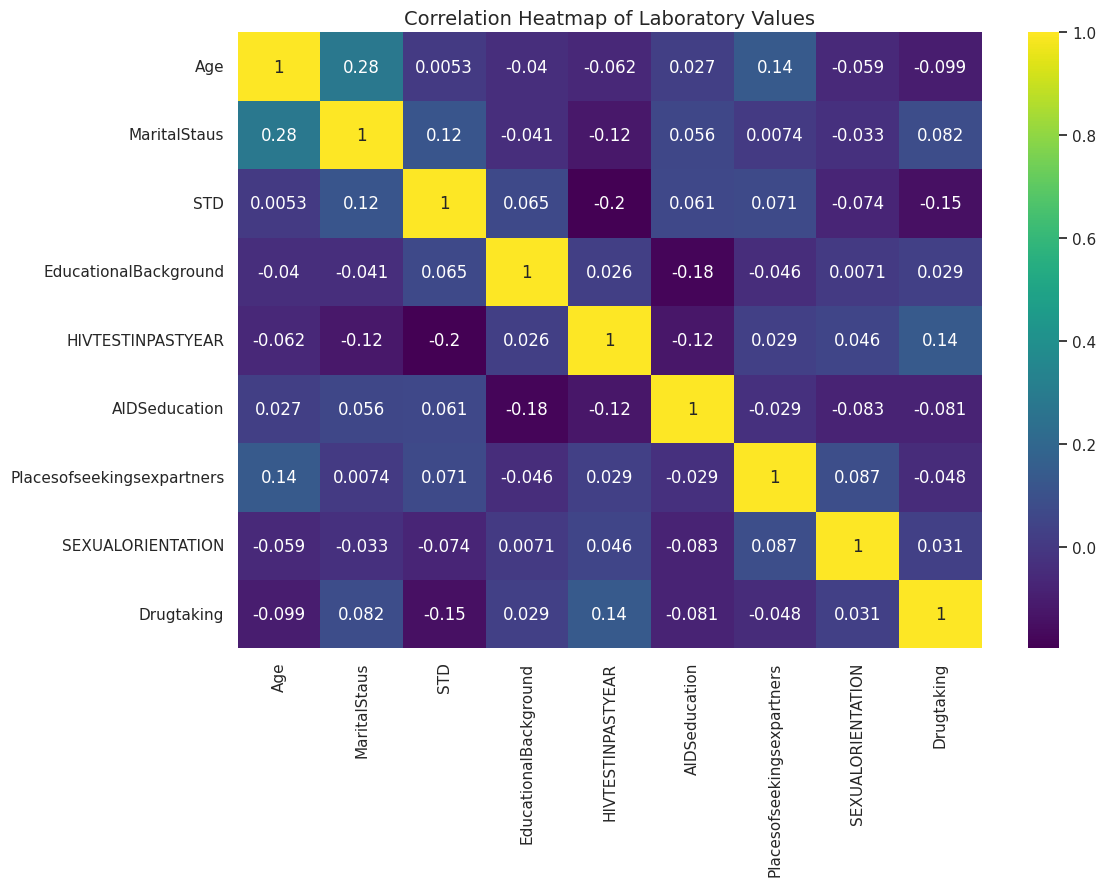

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Select the columns you want for correlation
cols_for_corr = ['Age', 'MaritalStaus', 'STD', 'EducationalBackground', 'HIVTESTINPASTYEAR', 'AIDSeducation', 'Placesofseekingsexpartners', 'SEXUALORIENTATION', 'Drugtaking']
selected_df = data[cols_for_corr]

# Convert categorical columns to numerical using Label Encoding or One-Hot Encoding
# Here, we'll use Label Encoding for simplicity
for col in selected_df.select_dtypes(include=['object']).columns:
    selected_df[col] = pd.factorize(selected_df[col])[0] # Factorize converts categories to numerical labels

plt.figure(figsize=(12, 8))

# Now, calculate the correlation matrix and plot the heatmap
sns.heatmap(selected_df.corr(), annot=True, cmap='viridis')

plt.title('Correlation Heatmap of Laboratory Values', fontsize=14)
plt.show()

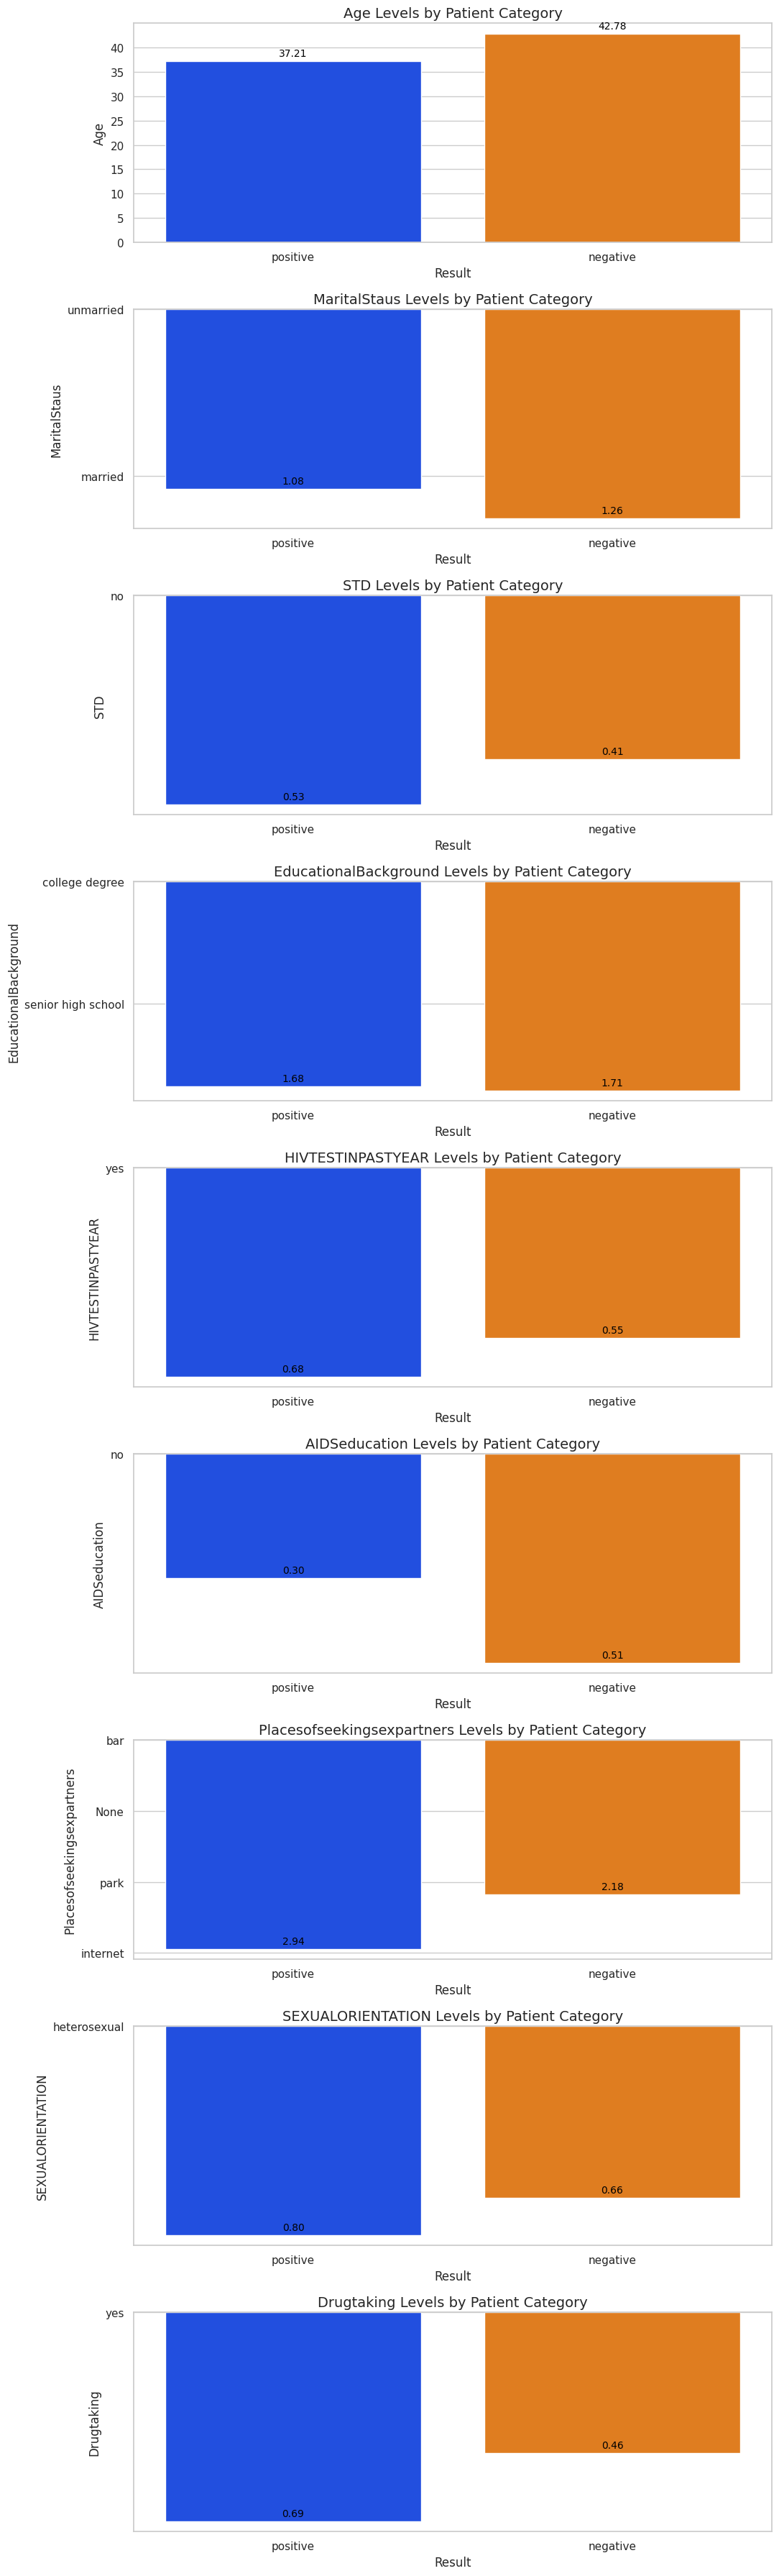

In [51]:
# Define the variables we want to analyze
variables = ['Age', 'MaritalStaus', 'STD', 'EducationalBackground', 'HIVTESTINPASTYEAR', 'AIDSeducation', 'Placesofseekingsexpartners', 'SEXUALORIENTATION', 'Drugtaking']

# Set up the figure
plt.figure(figsize=(11, len(variables) * 4))

for i, var in enumerate(variables, 1):
    plt.subplot(len(variables), 1, i)
    bars = sns.barplot(data=data, x='Result', y=var, ci=None, palette='bright')

    # Annotate each bar with its height
    for p in bars.patches:
        bars.annotate(f'{p.get_height():.2f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                      textcoords='offset points')

    # Add titles and labels
    plt.title(f'{var} Levels by Patient Category', fontsize=14)
    plt.xlabel('Result', fontsize=12)
    plt.ylabel(var, fontsize=12)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [52]:
# Filter the data for '1=positive' and '0=negative'
filtered_data = data[data['Result'].isin(['1=positive', '0=negative'])]

# Ensure that the filtered dataframe is not empty
if not filtered_data.empty:
    # Calculate mean values for the selected variables
    mean_values = filtered_data.groupby('Result')[['STD', 'Placesofseekingsexpartners', 'SEXUALORIENTATION']].mean().reset_index()

    # Set up the figure
    plt.figure(figsize=(15, 6))

    # Create stacked bar plot
    plt.bar(mean_values['Result'], mean_values['STD'], color='lightcoral', label='STD Status')
    plt.bar(mean_values['Result'], mean_values['Placesofseekingsexpartners'], color='lightblue',
            bottom=mean_values['STD'], label='Places of Seeking Sex Partners')
    plt.bar(mean_values['Result'], mean_values['SEXUALORIENTATION'], color='lightgreen',
            bottom=mean_values['STD'] + mean_values['Placesofseekingsexpartners'], label='Sexual Orientation')

    # Add titles and labels
    plt.title('Average STD, Places of Seeking Sex Partners, and Sexual Orientation by Result', fontsize=16)
    plt.xlabel('Patient Groups', fontsize=14)
    plt.ylabel('Average Levels', fontsize=14)

    # Annotate bar values
    for i, category in enumerate(mean_values['Result']):
        total = (mean_values.loc[i, 'STD'] +
                 mean_values.loc[i, 'Placesofseekingsexpartners'] +
                 mean_values.loc[i, 'SEXUALORIENTATION'])
        plt.text(i, total + 0.1, f'{total:.2f}', ha='center', color='black', fontsize=12)

    # Add a legend
    plt.legend(loc='upper left')

    # Display the plot
    plt.tight_layout()
    plt.show()
else:
    print("No data available for the selected categories.")


No data available for the selected categories.


# **Feature engineering**

In [53]:
from sklearn.preprocessing import LabelEncoder

# Creating the Label encoder
Label_pre = LabelEncoder()
data_cols=data.select_dtypes(exclude=['int','float']).columns
label_col =list(data_cols)

# Applying encoder
data[label_col]= data[label_col].apply(lambda col:Label_pre.fit_transform(col))

# Saved dataset with Label Encoder
data.to_csv("dataset_LabelEncoder.csv")

In [54]:
data.head()

,Age,MaritalStaus,STD,EducationalBackground,HIVTESTINPASTYEAR,AIDSeducation,Placesofseekingsexpartners,SEXUALORIENTATION,Drugtaking,Result
0,22,3,0,0,1,0,1,1,1,1
1,20,3,0,0,0,1,0,1,0,0
2,23,2,1,0,0,1,0,0,0,0
3,24,2,0,0,1,1,4,1,1,1
4,18,3,1,5,1,0,2,1,1,1


In [55]:
# Split the data into features (X) and target (y)
X = data.drop("Result", axis=1) # Drop the target column to get the features
y = data["Result"] # Set the target column


In [56]:
X.shape

(698, 9)

In [57]:
y.shape

(698,)

# **Model training and testing**

In [58]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize training data
print(f"Rows and columns of training data X_train:{X_train.shape}")
print(f"Rows and columns of training data y_train:{y_train.shape}")
print(f"Rows and columns of training data X_train:{X_test.shape}")
print(f"Rows and columns of training data y_train:{y_test.shape}")

Rows and columns of training data X_train:(558, 9)
Rows and columns of training data y_train:(558,)
Rows and columns of training data X_train:(140, 9)
Rows and columns of training data y_train:(140,)


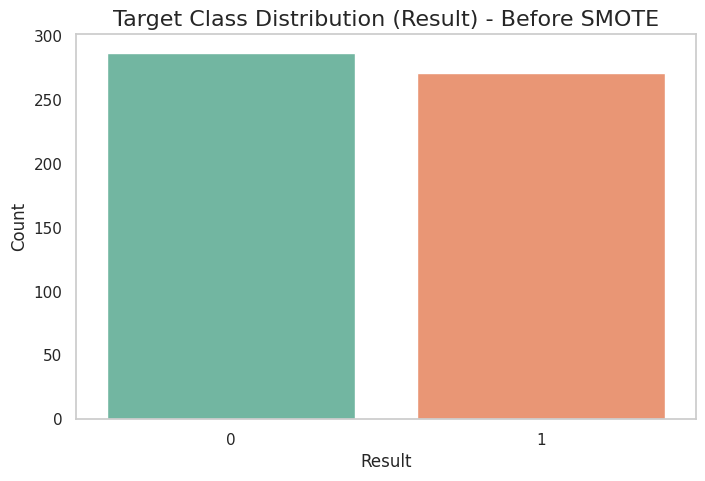


Class distribution before SMOTE:
Result
0    287
1    271
Name: count, dtype: int64


In [59]:
import pandas as pd # Import pandas library
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

plt.figure(figsize=(8, 5))
sns.countplot(x=y_train, palette='Set2')
plt.title('Target Class Distribution (Result) - Before SMOTE', fontsize=16)
plt.xlabel('Result', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(False)
plt.show()

print()
print(f"Class distribution before SMOTE:\n{pd.Series(y_train).value_counts()}")

In [60]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE with fewer neighbors to the training set to balance the classes
smote = SMOTE(k_neighbors=2, random_state=42)  # Reduce k_neighbors to 2 or any number < 5
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Viewing the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_res).value_counts())

Class distribution after SMOTE:
Result
0    287
1    287
Name: count, dtype: int64


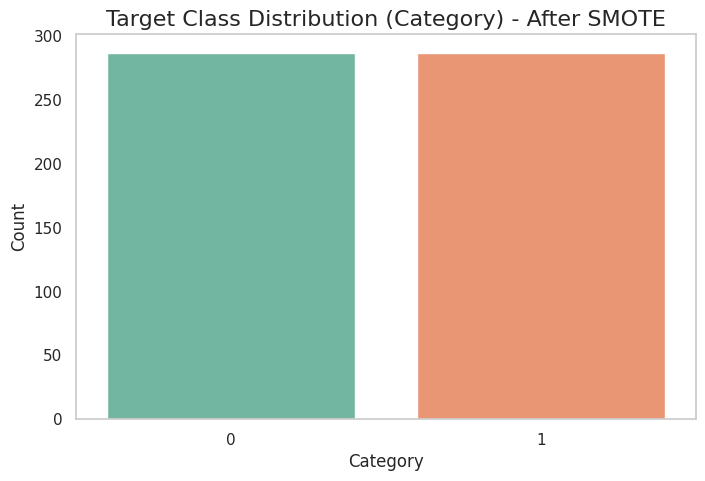


Class distribution after SMOTE:
Result
0    287
1    287
Name: count, dtype: int64


In [61]:
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_res, palette='Set2')
plt.title('Target Class Distribution (Category) - After SMOTE', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(False)
plt.show()

print()
print(f"Class distribution after SMOTE:\n{pd.Series(y_train_res).value_counts()}")


# **Part 8 - Machine learning models**

**Model Implementation and Data Splitting**

At the fifth stage of the project, I am focused on implementing machine learning models. I am developing eight distinct algorithms for analysis, which include Logistic Regression, Naive Bayes, Decision Tree, Random Forest, AdaBoost, Gradient Boosting, XGBoost, and LightGBM. This diversity of algorithms allows us to explore different approaches and techniques for the problem at hand. During the training process, we closely monitor the performance of each model, aiming to identify the one that best fits the data and provides the most accurate predictions. This stage is crucial as it allows us to evaluate and compare the performance of each algorithm, thereby selecting the most effective machine learning model for our specific application.

Throughout this stage, I am developing and training eight distinct machine learning algorithms. These algorithms were carefully selected to encompass a wide range of techniques and characteristics, aiming to capture the complexity and nuances of the data:
* SVC: SVC (Support Vector Classifier): SVC is a specific implementation of the Support Vector Machine algorithm that is designed specifically for classification tasks.
* Logistic Regression: A linear model used for solving binary classification
problems.

* Naive Bayes: A probabilistic model based on Bayes' theorem, suitable for classification problems with independent features.

* Decision Tree: A model that uses a tree structure to represent hierarchical decision rules.

* Random Forest: An ensemble learning technique that combines multiple decision trees to improve model accuracy and robustness.

* AdaBoost: Another ensemble learning algorithm that iteratively adjusts the weights of observations to focus on the most challenging cases.

* Gradient Boosting: An ensemble learning technique that builds decision trees sequentially, optimizing a specific loss criterion.

* XGBoost: An efficient implementation of gradient boosting, known for its speed and superior performance.

*  LightGBM: Another implementation of gradient boosting, designed to train models quickly and with efficient memory usage.
* ExtraTreesClassifier: Extra trees (short for extremely randomized trees) is an ensemble supervised machine learning method that uses decision trees and is used by the Train Using AutoML tool.


**Training and Evaluation**

Each of these algorithms is being trained and tuned using best practices in machine learning. After training, we evaluate the performance of each model on a validation set, using metrics appropriate to our problem, such as accuracy, recall, F1-score, among others.


**Selection of the Best Model**

At the end of this process, we will compare the performance of all models and select the one that shows the best results according to our evaluation criteria. This choice will be based not only on the performance metric but also on the interpretability of the model, its generalization capability, and its suitability to the problem requirements.

This meticulous and comprehensive approach will allow us to identify the most effective machine learning model to solve our specific problem, providing valuable insights and driving informed decision-making.

Best value of K: 1


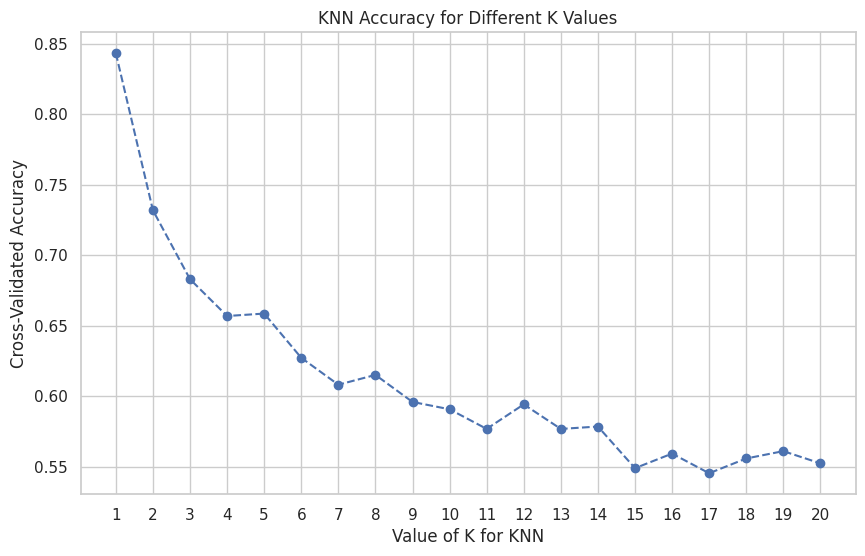

Accuracy of KNN with K=1: 0.8786


In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score # Import cross_val_score
from sklearn.metrics import accuracy_score


# ... (rest of your code)
# Define the range of K values to test
param_grid = {'n_neighbors': range(1, 21)}  # Testing K values from 1 to 20

# Instantiate the KNN model
knn = KNeighborsClassifier()

# Apply GridSearchCV to find the best value of K
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=15, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_res, y_train_res)

# Best value of K
best_k = grid_search.best_params_['n_neighbors']
print(f"Best value of K: {best_k}")

# Best KNN model
best_knn_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_knn_model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

# Range of K values to test
k_range = range(1, 21)

# Empty list to store cross-validation scores
cv_scores = []

# Perform cross-validation for each K
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_res, y_train_res, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plotting the accuracy vs K values
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, marker='o', linestyle='dashed', color='b')
plt.title('KNN Accuracy for Different K Values')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(np.arange(1, 21, 1))
plt.grid(True)
plt.show()

print(f"Accuracy of KNN with K={best_k}: {accuracy:.4f}")

In [63]:
def clean_column_names(data):
    data.columns = [re.sub(r"[^a-zA-Z0-9_]", "_", col) for col in data.columns]
    return data

In [64]:
%%time
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Define the value of K based on the GridSearchCV results
k_value = 1  # Replace with the optimal value of K from your GridSearchCV

# Add ExtraTreesClassifier to the models dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=k_value, metric='manhattan'),  # Set K and distance metric
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "SVC": SVC(),
    "LightGBM": LGBMClassifier(verbose=-1),  # Suppress all logs and warnings
    "Extra Trees": ExtraTreesClassifier()  # 10th algorithm added
}

# Define parameter grids for each model, including ExtraTreesClassifier
param_grids = {
    'Logistic Regression': { 'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']},
    'Naive Bayes': {},  # Naive Bayes has fewer hyperparameters to tune
    'Decision Tree Classifier': {'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'KNN': {'n_neighbors': range(1, 21), 'metric': ['manhattan']},  # Test different K values with Manhattan distance
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    'Gradient Boosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'XGBoost': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'LightGBM': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'num_leaves': [31, 50, 100]},
    'Extra Trees': {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}  # Hyperparameters for Extra Trees
}

# Step 3: Iterate through each model and apply GridSearchCV for hyperparameter tuning
for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")

    # Fetch the parameter grid for the current model
    param_grid = param_grids.get(model_name, {})

    # If param_grid is empty (e.g., Naive Bayes), skip tuning
    if param_grid:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

        # Fit GridSearchCV with resampled training data
        grid_search.fit(X_train_res, y_train_res)

        # Best parameters and accuracy for the model
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        best_model = grid_search.best_estimator_

        # Evaluate the tuned model on the test set
        y_pred_best = best_model.predict(X_test)
        best_accuracy = accuracy_score(y_test, y_pred_best)
        print(f'{model_name} Best Accuracy: {best_accuracy:.2f}')
    else:
        # If no hyperparameters to tune, just fit and evaluate the model
        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'{model_name} Accuracy without tuning: {accuracy:.2f}')

    print("-" * 60)


Tuning hyperparameters for Logistic Regression...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Logistic Regression Best Accuracy: 0.74
------------------------------------------------------------
Tuning hyperparameters for Naive Bayes...
Naive Bayes Accuracy without tuning: 0.71
------------------------------------------------------------
Tuning hyperparameters for Decision Tree Classifier...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for Decision Tree Classifier: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Classifier Best Accuracy: 0.94
------------------------------------------------------------
Tuning hyperparameters for Random Forest...
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Fo

In [65]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models with best hyperparameters
random_forest = RandomForestClassifier(
    max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300, random_state=42
)
decision_tree = DecisionTreeClassifier(
    max_depth=30, min_samples_leaf=1, min_samples_split=2, random_state=42
)
lightgbm = lgb.LGBMClassifier(
    learning_rate=0.2, n_estimators=100, num_leaves=31, random_state=42
)
extra_trees = ExtraTreesClassifier(
    max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42
)

# Combine models using VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('Gradient Boosting', GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5)),
        ('rf', random_forest),
        ('dt', decision_tree),
        ('et', extra_trees)
    ],
    voting='soft'  # Use 'soft' for probability-based voting, 'hard' for majority voting
)

# Train ensemble model
ensemble_model.fit(X_train, y_train)

# Evaluate ensemble model
y_pred = ensemble_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Ensemble Model Accuracy: {accuracy:.2f}")


Ensemble Model Accuracy: 0.95


In [66]:
!pip install catboost
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, verbose=0)
catboost_model.fit(X_train_res, y_train_res)

y_pred_catboost = catboost_model.predict(X_test)
catboost_accuracy = accuracy_score(y_test, y_pred_catboost)
print(f'CatBoost Accuracy: {catboost_accuracy:.2f}')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00
CatBoost Accuracy: 0.95


# **Evaluation and metrics**



**Part 11.0 - Confusion matrix**

Training Logistic Regression...


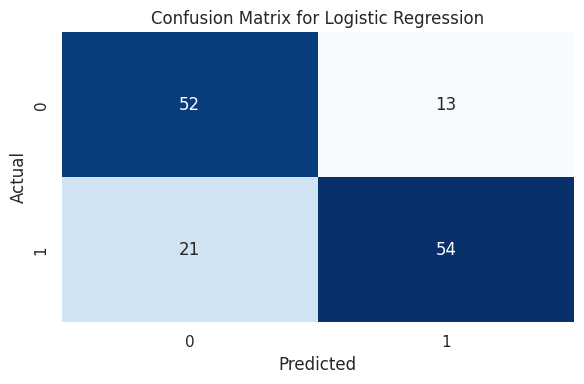

------------------------------------------------------------
Training Naive Bayes...


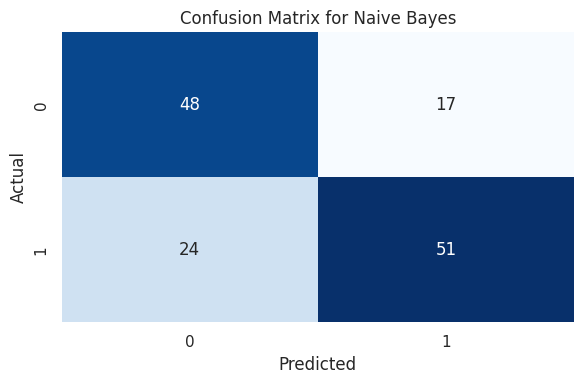

------------------------------------------------------------
Training Decision Tree Classifier...


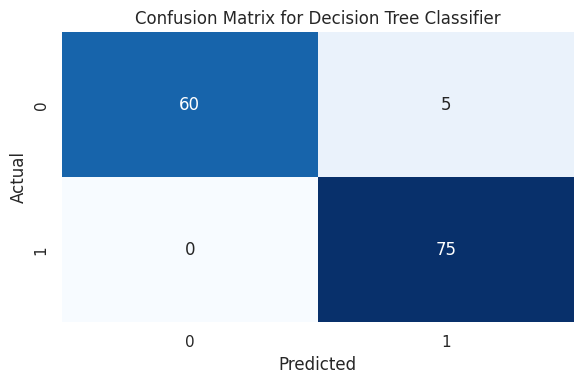

------------------------------------------------------------
Training Random Forest...


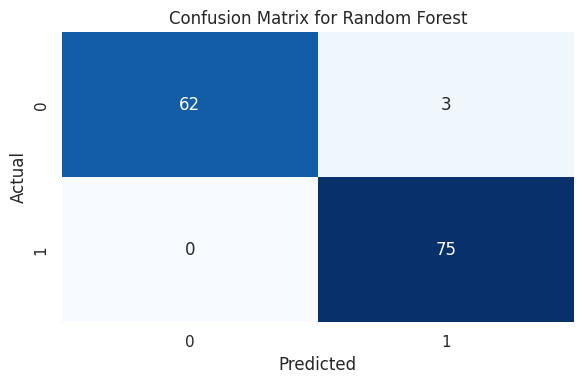

------------------------------------------------------------
Training KNN...


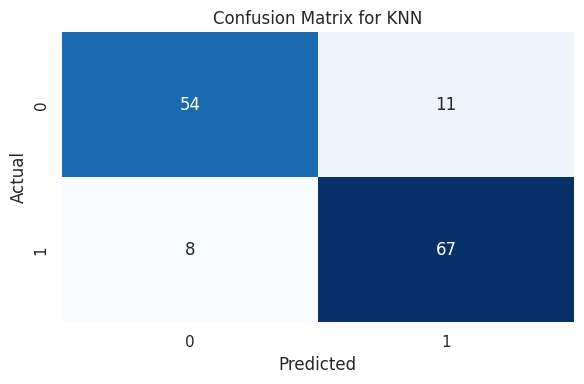

------------------------------------------------------------
Training AdaBoost...


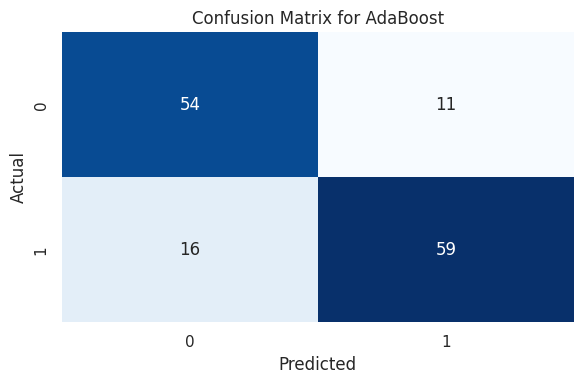

------------------------------------------------------------
Training Gradient Boosting...


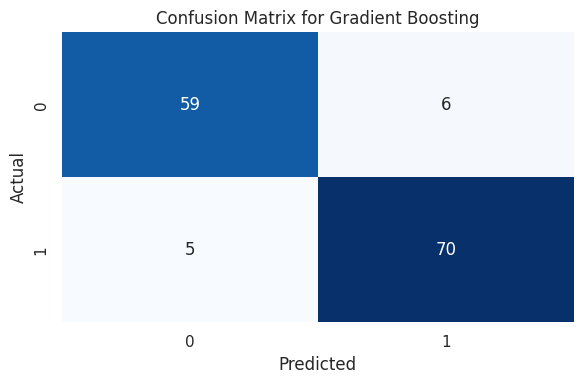

------------------------------------------------------------
Training XGBoost...


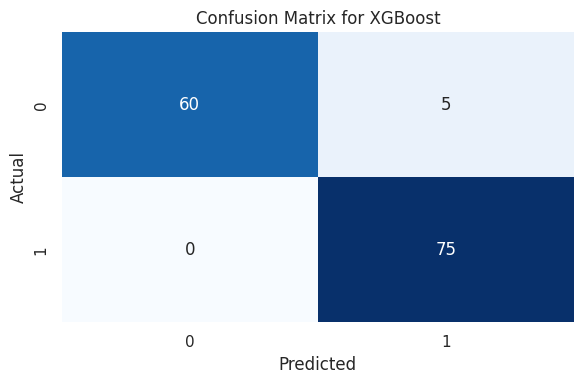

------------------------------------------------------------
Training SVC...


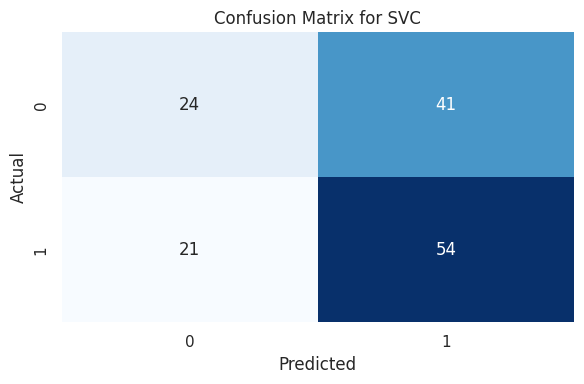

------------------------------------------------------------
Training LightGBM...


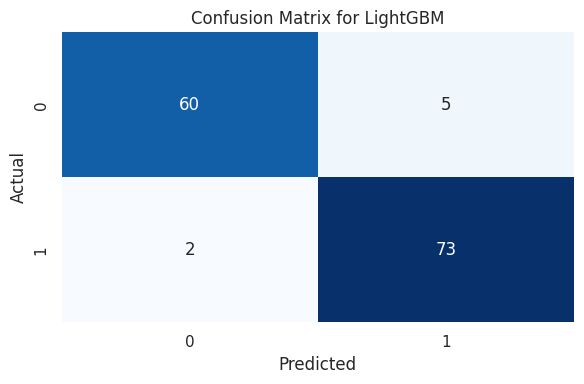

------------------------------------------------------------
Training Extra Trees...


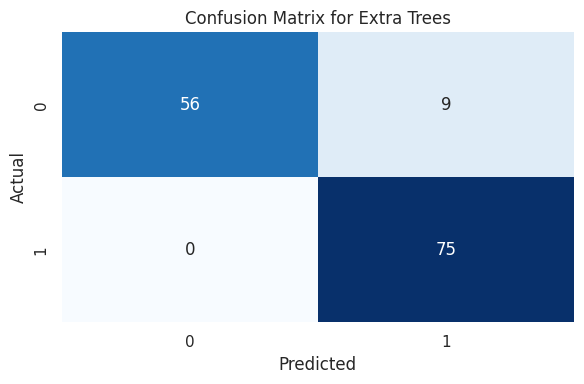

------------------------------------------------------------


In [67]:
from sklearn.metrics import confusion_matrix

# Step 4: Iterate over models and plot confusion matrix for each
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model with the balanced dataset
    model.fit(X_train_res, y_train_res)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Step 5: Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Step 6: Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    print("-" * 60)

**Part 11.1 -Classification Report**

In [68]:
from sklearn.metrics import classification_report

# Model dictionary with 8 models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "SVC": SVC(),
    "LightGBM": LGBMClassifier(verbose=-1),
    "Extra Trees": ExtraTreesClassifier()# Suppress all logs and warnings
}

# Step 2: Iterate over models and compute classification reports
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model on the balanced data
    model.fit(X_train_res, y_train_res)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Step 3: Compute and display the classification report
    print(f"Classification Report for {model_name}:")
    report = classification_report(y_test, y_pred)
    print(report)

    print("-" * 60)

Training Logistic Regression...
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        65
           1       0.81      0.72      0.76        75

    accuracy                           0.76       140
   macro avg       0.76      0.76      0.76       140
weighted avg       0.76      0.76      0.76       140

------------------------------------------------------------
Training Naive Bayes...
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        65
           1       0.75      0.68      0.71        75

    accuracy                           0.71       140
   macro avg       0.71      0.71      0.71       140
weighted avg       0.71      0.71      0.71       140

------------------------------------------------------------
Training Decision Tree Classifier...
Classification Report for Decision Tree Class

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Model dictionary with 8 models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "SVC": SVC(),
    "LightGBM": LGBMClassifier(verbose=-1),
    "Extra Trees": ExtraTreesClassifier()  # Suppress all logs and warnings
}

# Example dataset split (You should replace this with your actual data)
# X_train_res, X_test, y_train_res, y_test = train_test_split(X, y, test_size=0.2)

# Initialize an empty list to store the metrics for each model
metrics_list = []

# Step 2: Iterate over models
for model_name, model in models.items():
    # Train the model with the balanced data
    model.fit(X_train_res, y_train_res)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Step 3: Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append the metrics for this model
    metrics_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Convert the list of metrics into a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Find the best model based on F1-Score (or you can choose Accuracy)
best_model_idx = metrics_df['F1-Score'].idxmax()

# Function to highlight the best model row in green (or any color)
def highlight_best(s):
    return ['background-color: green' if s.name == best_model_idx else '' for _ in s]

# Apply the highlighting function to the DataFrame
styled_df = metrics_df.style.apply(highlight_best, axis=1)

# Display the DataFrame with the best model highlighted
styled_df


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.757143,0.762494,0.757143,0.757341
1,Naive Bayes,0.707143,0.711310,0.707143,0.707457
2,Decision Tree Classifier,0.935714,0.937649,0.935714,0.935465
3,Random Forest,0.964286,0.966518,0.964286,0.964147
4,AdaBoost,0.807143,0.809694,0.807143,0.807389
5,Gradient Boosting,0.921429,0.921434,0.921429,0.921384
6,XGBoost,0.964286,0.966518,0.964286,0.964147
7,SVC,0.557143,0.552130,0.557143,0.542934
8,LightGBM,0.950000,0.950682,0.950000,0.949900
9,Extra Trees,0.964286,0.966518,0.964286,0.964147


# **Test Model**

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         698 non-null    int64
 1   MaritalStaus                698 non-null    int64
 2   STD                         698 non-null    int64
 3   EducationalBackground       698 non-null    int64
 4   HIVTESTINPASTYEAR           698 non-null    int64
 5   AIDSeducation               698 non-null    int64
 6   Placesofseekingsexpartners  698 non-null    int64
 7   SEXUALORIENTATION           698 non-null    int64
 8   Drugtaking                  698 non-null    int64
 9   Result                      698 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [71]:
df

,Age,MaritalStaus,STD,EducationalBackground,HIVTESTINPASTYEAR,AIDSeducation,Placesofseekingsexpartners,SEXUALORIENTATION,Drugtaking,Result
0,22,unmarried,no,college degree,yes,no,bar,heterosexual,yes,positive
1,20,unmarried,no,college degree,no,yes,NaN,heterosexual,no,negative
2,23,married,yes,college degree,no,yes,NaN,bisexual,no,negative
3,24,married,no,college degree,yes,yes,park,heterosexual,yes,positive
4,18,unmarried,yes,senior high school,yes,no,internet,heterosexual,yes,positive
...,...,...,...,...,...,...,...,...,...,...
693,19,unmarried,yes,illiteracy,no,no,internet,heterosexual,no,positive
694,47,married,no,college degree,no,yes,bar,bisexual,no,negative
695,34,unmarried,yes,senior high school,yes,yes,park,homosexual,yes,negative
696,25,married,no,junior high school,no,no,public bath,heterosexual,yes,positive


In [72]:
data

,Age,MaritalStaus,STD,EducationalBackground,HIVTESTINPASTYEAR,AIDSeducation,Placesofseekingsexpartners,SEXUALORIENTATION,Drugtaking,Result
0,22,3,0,0,1,0,1,1,1,1
1,20,3,0,0,0,1,0,1,0,0
2,23,2,1,0,0,1,0,0,0,0
3,24,2,0,0,1,1,4,1,1,1
4,18,3,1,5,1,0,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...
693,19,3,1,2,0,0,2,1,0,1
694,47,2,0,0,0,1,1,0,0,0
695,34,3,1,5,1,1,4,3,1,0
696,25,2,0,3,0,0,5,1,1,1


In [73]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Instantiate and train the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)

# Test new data
new_inputs = np.array([
    [22, 3, 0, 0, 1, 0, 1, 1, 1],
])

print("\nPredict Patient By Given Data")
# Iterate over each row of inputs for prediction
for new_input in new_inputs:
    # Reshape the new_input to match the expected input shape (1, n_features)
    new_input = new_input.reshape(1, -1)

    # Make predictions
    prediction = rf.predict(new_input)
    prediction_proba = rf.predict_proba(new_input)  # Use predict_proba for probability estimates

    patient_predict = prediction[0]
    if patient_predict == 0:
        print("HIV NEGETIVE!")
    elif patient_predict == 1:
        print("HIV Positive!")

    # Optional: Print prediction probabilities
    #print(f"Prediction Probabilities: {prediction_proba}")



Predict Patient By Given Data
HIV Positive!
